# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Indira Anindha Maharani
- **Email:** m004b4kx1974@bangkit.academy
- **ID Dicoding:** indiranindha

## Menentukan Pertanyaan Bisnis

- What specific hours do bikes most in demand both in weekdays and weekend?
- How is the correlation between temperature and total bike rental?

## Import Semua Packages/Library yang Digunakan

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import jinja2 


## Data Wrangling

### Gathering Data

read dataset 'day'

In [260]:
df_day = pd.read_csv('day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


read dataset 'hour'

In [261]:
df_hour = pd.read_csv('hour.csv', delimiter=",")
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


count the total of row and column in day dataset

In [262]:
print("Row: ", df_day.shape[0])
print("Colomn: ", df_day.shape[1])

Row:  731
Colomn:  16


count the total of row and column in hour dataset

In [263]:
print("Row: ", df_hour.shape[0])
print("Colomn: ", df_hour.shape[1])

Row:  17379
Colomn:  17


**Insight:**
- DataFrame 'day' has 731 total data, in which separated by 16 variables per each.
- DataFrame 'hour' has 17379 total data, in which separated by 17 variables per each.

### Assessing Data

In [264]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [265]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [266]:
df_day.duplicated().sum()

np.int64(0)

In [267]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [268]:
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
df_day.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
df_day.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
df_day.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df_day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
df_day.workingday.replace((0,1), ('No', 'Yes'), inplace=True)
df_day.head()

C:\Users\indir\AppData\Local\Temp\ipykernel_49760\3183247024.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\indir\AppData\Local\Temp\ipykernel_49760\3183247024.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [269]:
print(df_hour.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [270]:
print(df_hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [271]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [273]:
Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_hour[(df_hour['cnt'] < lower_bound) | (df_hour['cnt'] > upper_bound)]
outliers

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


In [176]:
df_day['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [274]:
df_hour['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

**Insight:**
- Data 'day' menunjukkan ketidakcocokan data type pada kolom 'dteday' yang berupa [object]
- Data 'hour' menunjukkan ketidakcocokan data type pada kolom 'dteday' yang berupa [object]
- Tidak ditemukan missing value pada kedua data
- Terdapat data tidak konsisten antara dataset 'day' dan 'hour' pada kolom 'weathersit'. Dimana day dataset mempunyai 3 unique value, sedangkan hour dataset mempunyai 4 unique value

### Cleaning Data

In [275]:
#convert dteday to datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.set_index('dteday', inplace=True)

#droping high cardinality features
df_day.drop(columns=['instant'], inplace=True)
df_day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,Winter,2012,Dec,0,Thursday,Yes,Misty,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,Winter,2012,Dec,0,Friday,Yes,Misty,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,Winter,2012,Dec,0,Saturday,No,Misty,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [276]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.set_index('dteday', inplace=True)

df_hour.drop(columns=['instant'], inplace=True)
df_hour

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


**Insight:**
- Datatype of 'dteday' for both in dataset 'day' and 'hour' are changed from [object] to [datetime]
- Removing the column 'instant' for both dataset since it won't needed

## Exploratory Data Analysis (EDA)

### Explore Unvariate Variable
Total of Bikeshare

In [277]:
df_day.describe(include='number').style.background_gradient(cmap='Greys')

,yr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.500342,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,2011.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012.000000,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012.000000,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


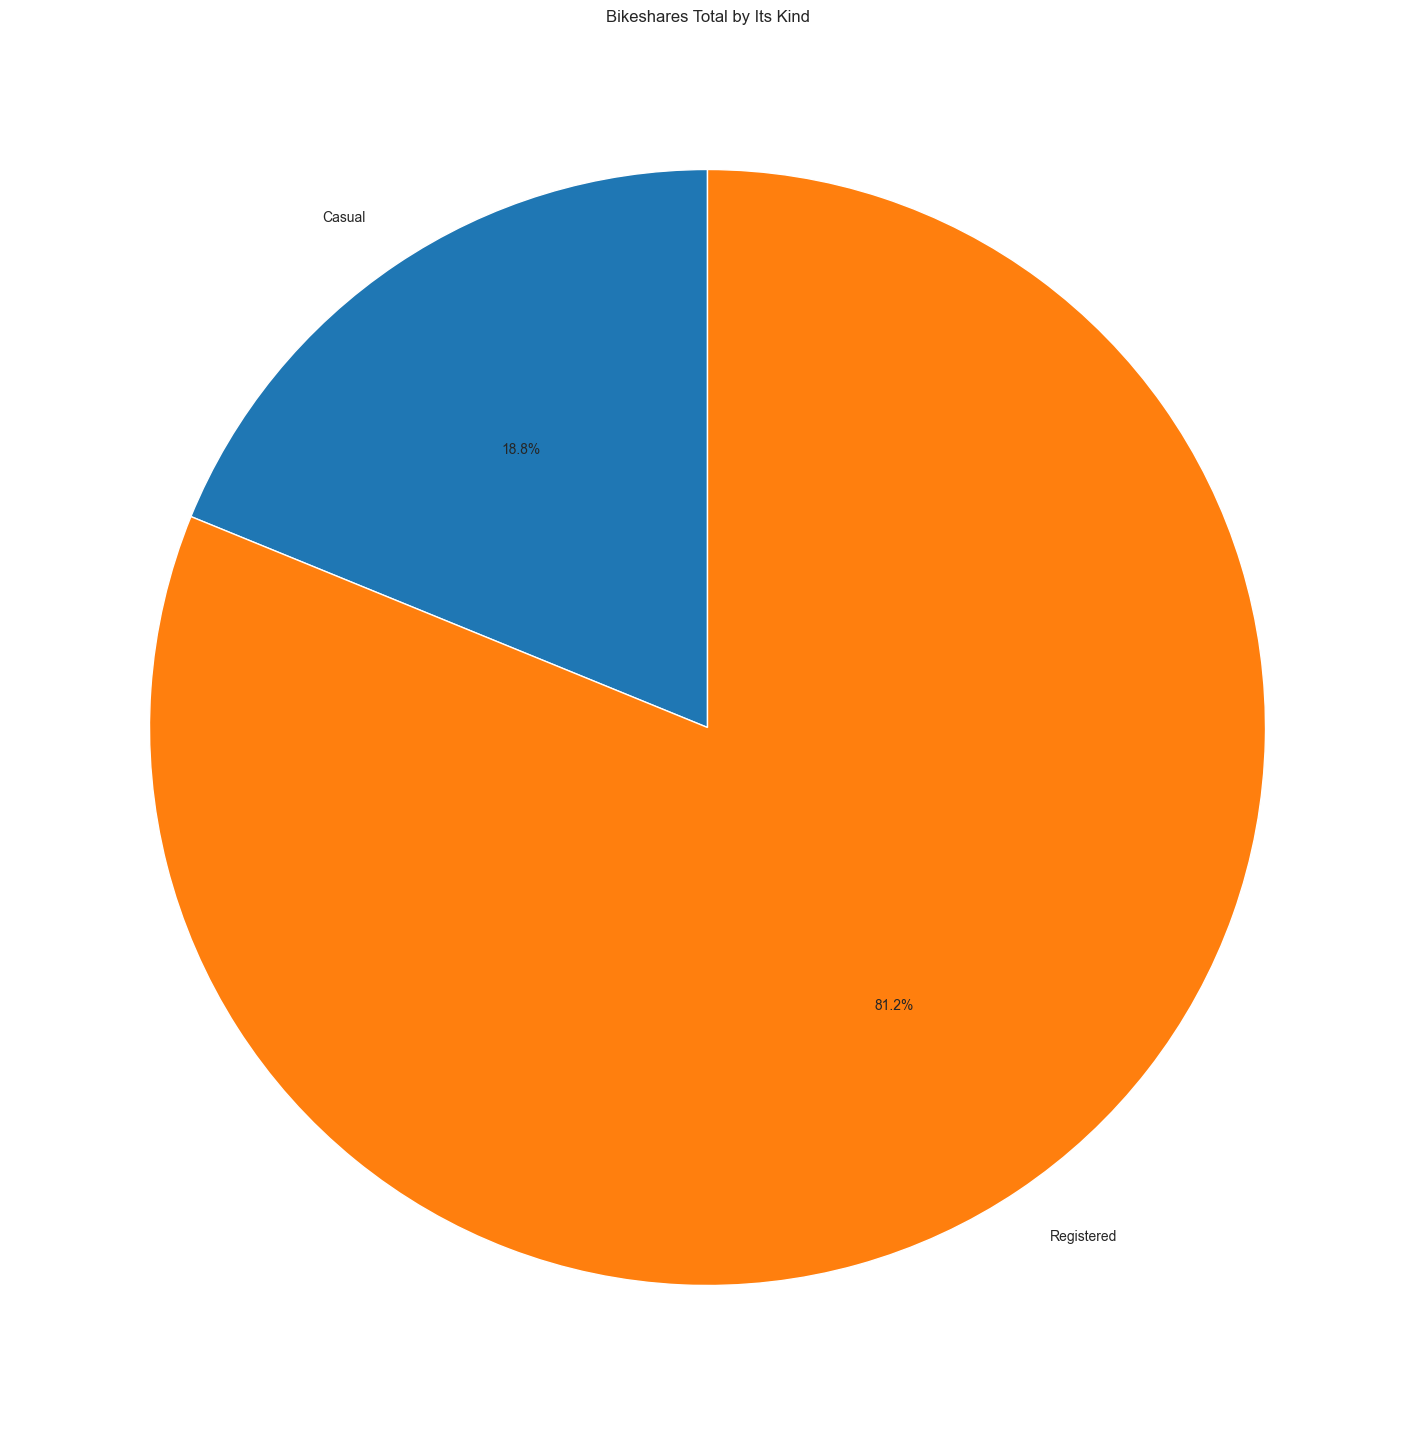

In [278]:
# Data
casual = df_day['casual'].sum()
registered = df_day['registered'].sum()

# Membuat pie chart
plt.figure(figsize=(18,78))
plt.pie([casual, registered], labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90)
plt.title('Bikeshares Total by Its Kind')
plt.show()

### Explore Multivariate Variable

In [279]:
df_hour.describe(include='number').style.background_gradient(cmap='Greys')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [280]:
df_hour.groupby(by='hr').mean()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
hr,,,,,,,,,,,,,,
0,2.500000,0.502755,6.534435,0.028926,3.004132,0.683196,1.398072,0.467410,0.451105,0.691019,0.161758,10.158402,43.739669,53.898072
1,2.497238,0.502762,6.526243,0.029006,3.008287,0.682320,1.400552,0.459365,0.443289,0.704213,0.158659,6.504144,26.871547,33.375691
2,2.511888,0.507692,6.567832,0.029371,3.027972,0.681119,1.409790,0.454573,0.439184,0.716825,0.154519,4.772028,18.097902,22.869930
3,2.539455,0.509326,6.645624,0.025825,3.027260,0.674319,1.424677,0.453113,0.438396,0.729785,0.150929,2.715925,9.011478,11.727403
4,2.552367,0.516499,6.664275,0.028694,3.011478,0.674319,1.426112,0.446628,0.432549,0.742367,0.155813,1.253945,5.098996,6.352941
5,2.513250,0.507671,6.581590,0.029289,3.023710,0.690377,1.422594,0.436123,0.423145,0.742929,0.150342,1.411437,18.478382,19.889819
6,2.497931,0.502069,6.531034,0.028966,3.009655,0.684138,1.451034,0.432469,0.419376,0.744179,0.157722,4.161379,71.882759,76.044138
7,2.496561,0.500688,6.525447,0.028886,3.001376,0.682256,1.486933,0.439092,0.425557,0.730908,0.163916,11.055021,201.009629,212.064649
8,2.496561,0.500688,6.525447,0.028886,3.001376,0.682256,1.474553,0.454993,0.440272,0.702682,0.176563,21.679505,337.331499,359.011004


**Insight:**
- Most Bikeshare is coming from people who registered 81.2%, and the rest is casual.
- Bikeshare is highly demanded at 5 pm until 6 pm, around 426-461 in total

## Visualization & Explanatory Analysis

### Pertanyaan 1: What specific hours do bikes most in demand both in weekdays and weekend?


**WEEKDAYS**

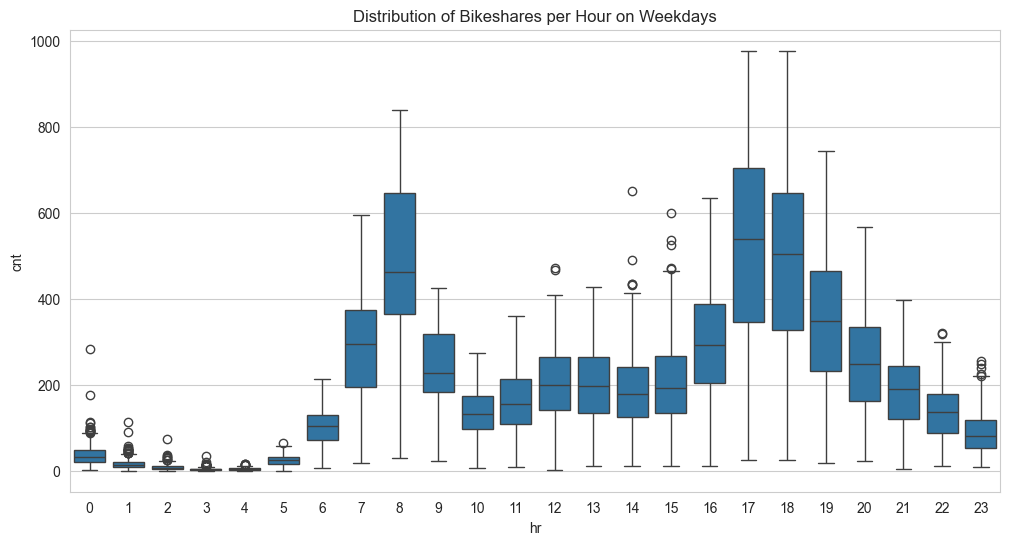

In [281]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=df_hour[df_hour['workingday']==1])
plt.title('Distribution of Bikeshares per Hour on Weekdays')
for artist in ax.artists:
    for box in artist.boxplots:
        box.xaxis.grid(False)
        box.yaxis.grid(False)
        for i in range(len(box.fliers)):
            box.fliers[i].set(marker='o', markersize=3)
plt.show()

**WEEKENDS**

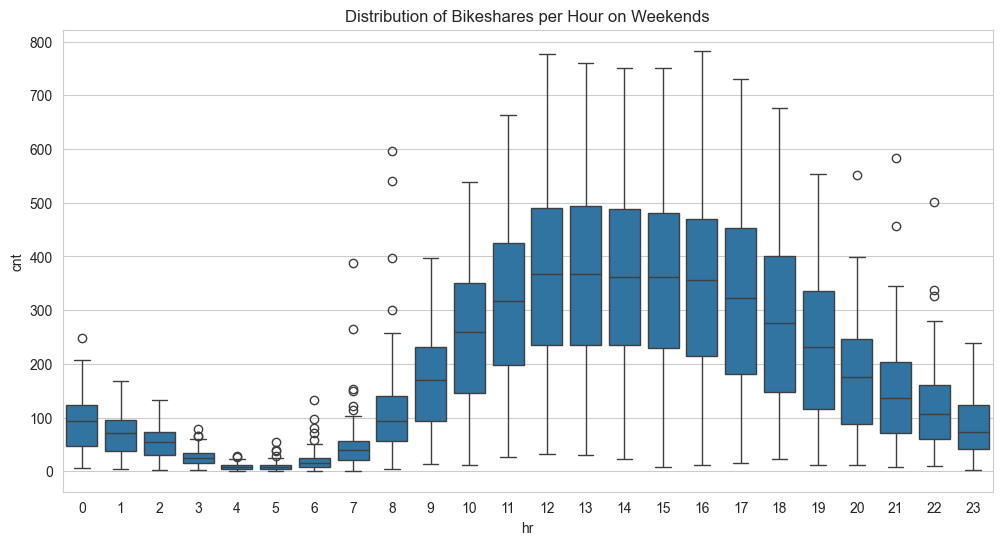

In [282]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=df_hour[df_hour['workingday']==0])
plt.title('Distribution of Bikeshares per Hour on Weekends')
for artist in ax.artists:
    for box in artist.boxplots:
        box.xaxis.grid(False)
        box.yaxis.grid(False)
        for i in range(len(box.fliers)):
            box.fliers[i].set(marker='o', markersize=3)
plt.show()

### Pertanyaan 2: How does temperature affect bike share?

C:\Users\indir\AppData\Local\Temp\ipykernel_49760\4057580710.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\indir\AppData\Local\Temp\ipykernel_49760\4057580710.py:11: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



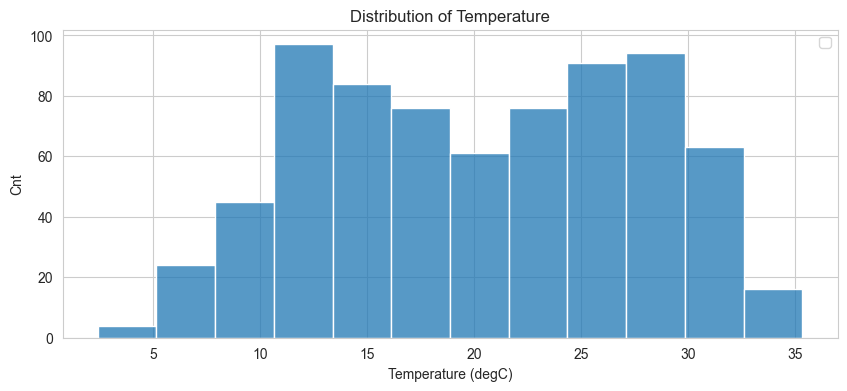

In [283]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

df_day['temp'] = df_day['temp']*41
# Distribution Figure
sns.histplot(x='temp', data=df_day, ax=ax)
ax.set_title('Distribution of Temperature')
ax.set_xlabel('Temperature (degC)')
ax.set_ylabel('Cnt')

plt.legend()
fig.show();

**Insight:**
- It is shown that on Weekdays, people use the most bikeshare at peak 5 pm, 6 pm, and 8 am
- Meanwhile, the distribution plot for bikeshare on Weekends is dynamic, from 12 pm until 5 pm are hectic hours 
- In temperature is too cold or too hot, bikeshare has low demand. It has high demand when the temperature is 10-30 degC

## Analisis Lanjutan (Opsional)

## Conclusion

(1) Dapat disimpulkan bahwa pada Weekday fasilitas bikeshare banyak digunakan sebagai transportasi untuk berangkat-pulang kerja atau ke sekolah dikarenakan peminatnya berada paling tinggi pada pukul 8 pagi, 5 sore, dan 6 sore. Sedangkan pada saat Weekend, bikeshare cukup diminati untuk bepergian karena paling banyak digunakan pada jam aktif manusia yaitu mulai dari pukul 12 siang hingga 5 sore.
(2) Selain itu, suhu di luar ruangan cukup mempengaruhi penggunaan bikeshare. Hal ini dibuktikan melalui dataset "day" yang menunjukkan bahwa saat temperatur berada diantara 10-30 degC, bikeshare banyak digunakan. Untuk suhu rendah (< 10degC) dan suhu tinggi (>30degC), bikeshare jarang diminati orang.